In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
def remove_outliers(data):

  df = data.copy()
  for col in list(df.columns):
    Q1 = df[str(col)].quantile(0.05)
    Q3 = df[str(col)].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

  return df

In [3]:
df = pd.read_csv('data_set_final_para_valer.csv')
columns_to_clean = ['revenue', 'budget']
df_cleaned = remove_outliers(df[columns_to_clean])
df.update(df_cleaned)
df = df[(df['revenue'] > 0) & (df['budget'] > 0)].copy()
df['profit'] = df['revenue'] - df['budget']

features = [
    'budget',
    'popularity',
    'runtime',
    'imdb',
    'rotten'
]

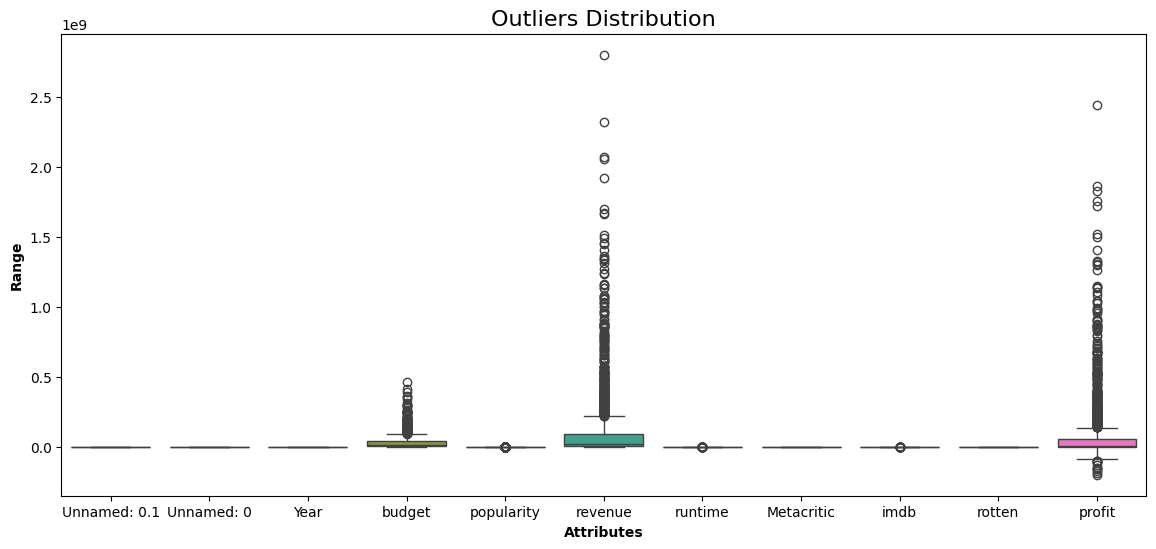

In [4]:
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(df)

<Axes: xlabel='cluster', ylabel='profit'>

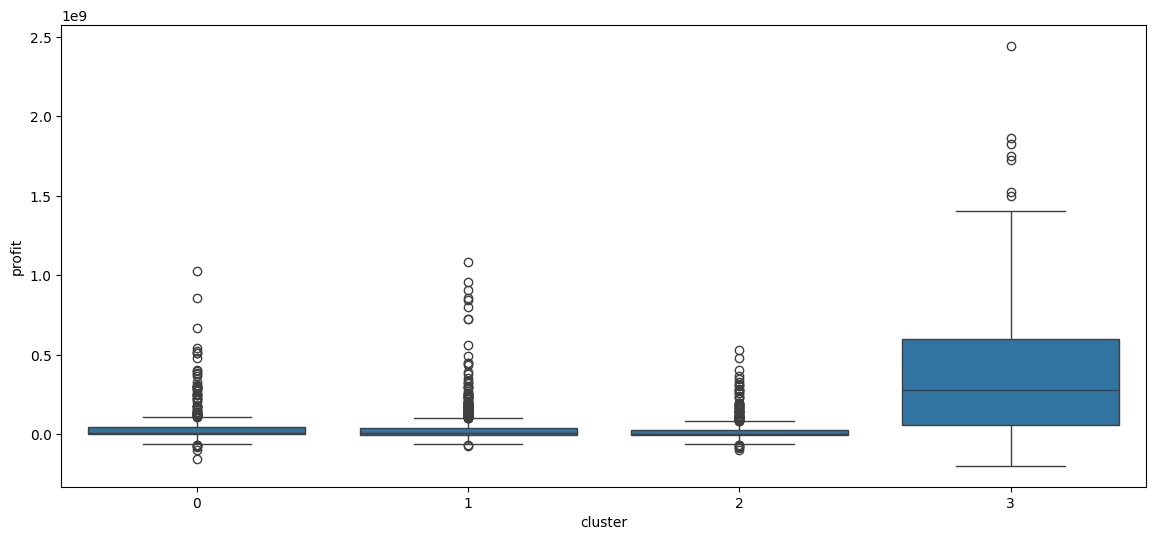

In [5]:

X = df[features].copy()
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled_df)

sns.boxplot(x='cluster', y='profit', data=df)

# confusion_matrix = pd.crosstab(df['cluster'], df['is_success'])
# print("Cluster vs Actual Success:")
# print(confusion_matrix)